In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math
import numpy as np
import pandas as pd

zone_bottom = 18.29
zone_height = 25.79
zone_width = 19.94

In [2]:
"""
Function to identify ball position for pitches [tunnel_distance] from home plate
Params:
    velo: velocity of pitch in mph
    vbreak: vertical break of pitch in inches
    hbreak: horizional break of pitch in inches
    release_height: height from home plate that pitch is release in inches 
    release_side: horizontal distance from middle of rubber that pitch is released in inches (-=lefty, +=righty)
    tunnel_distance: desired distance from home plate that tunnel is defined in feet
    release_angle: [horizonal release angle (HRA), vertical release angle (VRA)]
Returns:
    tunnel_coordinates: the pitch's location at tunnel_distance
"""
def tunnel(velo, vbreak, hbreak, extension, release_height, release_side, HRA, VRA, tunnel_distance=0):
    mound_distance = 60*12+6
    tunnel_distance = tunnel_distance * 12
    delta_z = mound_distance - extension - tunnel_distance
    
    vbreak_per_inch = vbreak / (mound_distance - extension)
    hbreak_per_inch = hbreak / (mound_distance - extension)
    
    x_velo = velo * math.sin(math.radians(HRA))
    y_velo = velo * math.sin(math.radians(VRA))
    try:
        z_velo = x_velo / math.tan(math.radians(HRA))
    except:
        try:
            z_velo = y_velo / math.tan(math.radians(VRA))
        except:
            z_velo = velo
    
    delta_x, delta_y = kinematic_calculation([x_velo,y_velo,z_velo], delta_z)
    y_additional_break = vbreak_per_inch * delta_z
    x_additional_break = hbreak_per_inch * delta_z
    
    
    x_at_tunnel = release_side + delta_x + x_additional_break
    y_at_tunnel = release_height + delta_y + y_additional_break
    
    tunnel_coordinates = [round(x_at_tunnel, 2), round(y_at_tunnel, 2)]
    
    return tunnel_coordinates
    
    

"""
Params: 
    v0: 3D vector [x,y,z] of initial velocity (coordinates defined from pitcher view)
"""
def kinematic_calculation(v0, delta_z):
    mph_to_inps = 17.6
    v0_x = v0[0] * mph_to_inps
    v0_y = v0[1] * mph_to_inps
    v0_z = v0[2] * mph_to_inps
    delta_t = delta_z / v0_z
    
    # y calculation (a in in/s^2)
    a = -386.0886
    delta_y = v0_y*delta_t + (1/2)*a*delta_t**2
    
    # x_calculation
    delta_x = v0_x*delta_t
    
    return delta_x, delta_y
    
test_fastball = tunnel(velo=91.5, vbreak=20.6, hbreak=7.0, extension=6*12, release_height=6*12, release_side=17.0, HRA=-2, VRA=-2)
test_slider = tunnel(velo=83.5, vbreak=6.0, hbreak=-4.0, extension=6*12, release_height=6*12, release_side=17.0, HRA=-2, VRA=-1.5)

In [3]:
def create_graph(pitches_df, tunnel_distance, pitcher_view=False):
    
    colors = ['blue', 'orange', 'green', 'yellow', 'black', 'red']
    fig, ax = plt.subplots()
    ax.add_patch(Rectangle((0-zone_width/2, zone_bottom), zone_width, zone_height,
                 edgecolor = 'blue',
                 fill=False,
                 lw=1))
    
    coordinates_df = {}
    
    for pitch, coor in pitches_df.items():
        coordinates_df[pitch] = [coor[0], coor[1]]
    i = 0
    labels = {'fb': 'Fastball', 'si': 'Sinker', 'sl': 'Slider', 'ch': 'Change-Up', 'cu': 'Curveball', 'fc': 'Cutter'}
    for pitch, coor in coordinates_df.items():
        plt.scatter(coor[0], coor[1], c=colors[i], label=labels[pitch])
        i += 1
    
    y_lim = [0, 80]
    x_lim = [-30, 30]
    
    
    plt.ylim(y_lim)
    plt.xlim(x_lim)
    plt.legend(bbox_to_anchor=(1,0.5) , loc='center left')
    plt.gca().set_aspect('equal', adjustable='box')
    if pitcher_view:
        plt.title(f'Pitcher View {tunnel_distance}ft From Home Plate')
    else:
        plt.title(f'Hitter View {tunnel_distance}ft From Home Plate')
    plt.show()

In [20]:
# # Sample RHP Data with high spin rate

fb_dict = {'velo': np.random.normal(95.2, 1.6, 500),
           'vbreak': np.random.normal(20.5, 1, 500),
           'hbreak': np.random.normal(8, .6, 500),
           'extension': np.random.normal(6*12, 1.6, 500),
           'rel_height': np.random.normal(76, 1.6, 500),
           'rel_side': np.random.normal(17, 1.6, 500),
           'hra': np.random.normal(-2.8, 0.06, 500),
           'vra': np.random.normal(-2.9, 0.06, 500)}
sl_dict = {'velo': np.random.normal(83.6, 1.6, 200),
           'vbreak': np.random.normal(0, .8, 200),
           'hbreak': np.random.normal(-8, 1.2, 200),
           'extension': np.random.normal(6*12, 1.6, 200),
           'rel_height': np.random.normal(6*12, 1.6, 200),
           'rel_side': np.random.normal(17, 1.6, 200),
           'hra': np.random.normal(-1, 0.15, 200),
           'vra': np.random.normal(-1.5, 0.15, 200)}
cu_dict = {'velo': np.random.normal(75.2, 1.6, 250),
           'vbreak': np.random.normal(-8, 1, 250),
           'hbreak': np.random.normal(-3, .5, 250),
           'extension': np.random.normal(6*12, 1.6, 250),
           'rel_height': np.random.normal(6*12, 1.6, 250),
           'rel_side': np.random.normal(17, 1.6, 250),
           'hra': np.random.normal(-1, 0.15, 250),
           'vra': np.random.normal(1.5, 0.15, 250)}

fb_df = pd.DataFrame(fb_dict)
sl_df = pd.DataFrame(sl_dict)
cu_df = pd.DataFrame(cu_dict)
fb_df

,velo,vbreak,hbreak,extension,rel_height,rel_side,hra,vra
0,94.493600,21.588227,8.157294,73.943377,74.817888,14.271457,-2.806540,-2.919182
1,95.272799,19.860967,8.986829,73.384690,75.344597,17.871002,-2.732498,-3.024059
2,93.532636,21.095428,8.232353,72.926802,73.435822,16.146898,-2.814081,-2.919599
3,92.925416,20.885492,7.100851,71.868057,75.331326,14.047731,-2.802156,-2.828113
4,94.883751,20.726019,7.588148,70.338724,78.710623,16.243531,-2.827886,-2.841536
...,...,...,...,...,...,...,...,...
495,95.461270,21.300103,7.732356,71.090939,75.850565,20.235740,-2.853765,-2.857336
496,96.633818,21.017527,7.693406,69.920626,77.092524,14.672389,-2.845250,-2.814588
497,95.333768,21.495583,8.245316,70.984366,74.090498,16.084835,-2.799392,-3.045352
498,93.952002,20.732819,8.853196,71.375214,74.961678,17.465128,-2.732090,-2.819511


In [21]:
# # Sample LHP Data with sinker

# fb_dict = {'velo': np.random.normal(92.6, 1.6, 500),
#            'vbreak': np.random.normal(5, 1, 500),
#            'hbreak': np.random.normal(-15, .6, 500),
#            'extension': np.random.normal(6*12, 1.6, 500),
#            'rel_height': np.random.normal(76, 1.6, 500),
#            'rel_side': np.random.normal(-17, 1.6, 500),
#            'hra': np.random.normal(2.5, 0.06, 500),
#            'vra': np.random.normal(-2.4, 0.06, 500)}
# sl_dict = {'velo': np.random.normal(83.6, 1.6, 200),
#            'vbreak': np.random.normal(0, .8, 200),
#            'hbreak': np.random.normal(8, 1.2, 200),
#            'extension': np.random.normal(6*12, 1.6, 200),
#            'rel_height': np.random.normal(6*12, 1.6, 200),
#            'rel_side': np.random.normal(-17, 1.6, 200),
#            'hra': np.random.normal(1.5, 0.15, 200),
#            'vra': np.random.normal(-1.5, 0.15, 200)}
# cu_dict = {'velo': np.random.normal(75.2, 1.6, 250),
#            'vbreak': np.random.normal(-8, 1, 250),
#            'hbreak': np.random.normal(3, .5, 250),
#            'extension': np.random.normal(6*12, 1.6, 250),
#            'rel_height': np.random.normal(6*12, 1.6, 250),
#            'rel_side': np.random.normal(-17, 1.6, 250),
#            'hra': np.random.normal(1, 0.15, 250),
#            'vra': np.random.normal(1.5, 0.15, 250)}

# fb_df = pd.DataFrame(fb_dict)
# sl_df = pd.DataFrame(sl_dict)
# cu_df = pd.DataFrame(cu_dict)
# fb_df

In [22]:
# Create Sample Hot Zones
# Hot zone defined as 95+ exit velo for the type of pitcher on the mound

size = 100
x_coord = np.random.normal(3, 3.5, size=size)
y_coord = np.random.normal(26, 4, size=size)
hot_zone_size = 0.5 * zone_height * zone_width

hot_zone_list = []

for i in range(len(x_coord)):
    hot_zone_list.append([x_coord[i], y_coord[i]])
hot_zone_np = np.array(hot_zone_list)

def centroid(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return (sum_x/length, sum_y/length)

centroid = centroid(hot_zone_np)
radius = math.sqrt(hot_zone_size / math.pi)

Text(0.5, 1.0, 'Hot Zones')

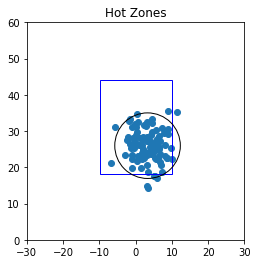

In [23]:
# Create Hot Zone Graph

fig, ax = plt.subplots()
ax.add_patch(Rectangle((0-zone_width/2, zone_bottom), zone_width, zone_height,
             edgecolor = 'blue',
             fill=False,
             lw=1))
circle = plt.Circle(centroid, radius, fill=False)
ax.add_patch(circle)
y_lim = [0, 60]
x_lim = [-30, 30]


plt.ylim(y_lim)
plt.xlim(x_lim)

plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_coord, y_coord)
plt.title('Hot Zones')

In [24]:
def check_if_in_hot_zone(coord, centroid, radius):
    return (coord[0] - centroid[0])**2 + (coord[1] - centroid[1])**2 < radius**2

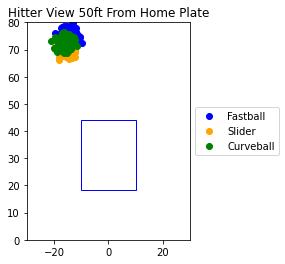

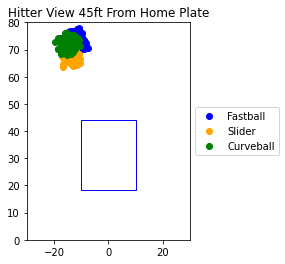

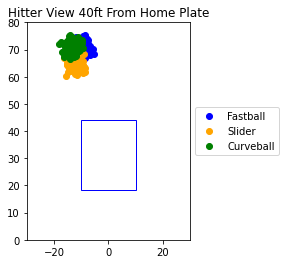

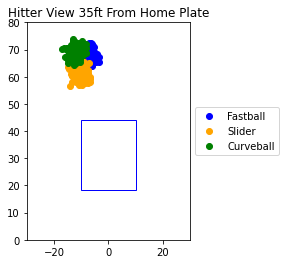

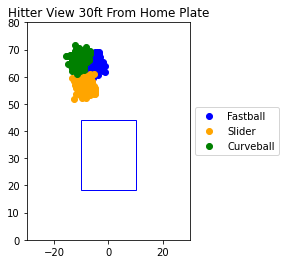

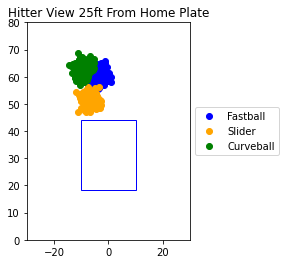

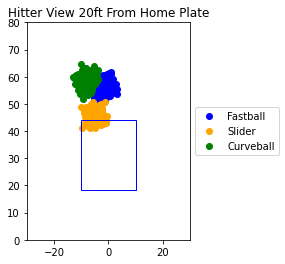

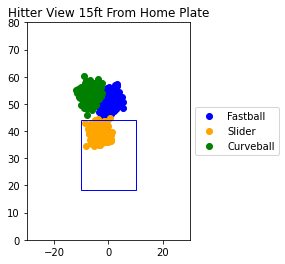

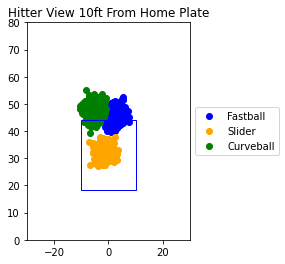

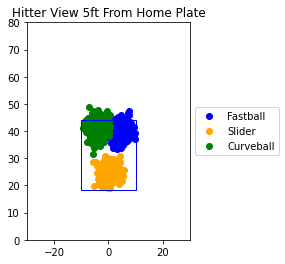

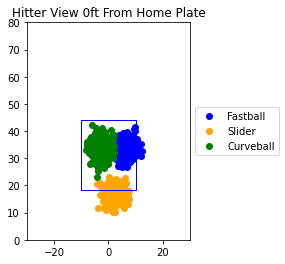

In [25]:
"""
Params:
    dataframes: dict with pitch type as key and df as value
"""

def execute(dataframes, pitcher_view=False, centroid=(0,0), radius=80, ends_in_zone=True):
    if pitcher_view:
        mult = 1
    else:
        mult = -1
    first_distance = 50
    step = 5
    
    pitches_dict = {}
    for tunnel_distance in range(first_distance, -1, -1 * step):
        for pitch_type, df in dataframes.items():
            x_coor = []
            y_coor = []
            
            drop_indices = []
            for index, row in df.iterrows():
                end_coor = tunnel(velo=row['velo'], vbreak=row['vbreak'], hbreak=row['hbreak'], extension=row['extension'], release_height=row['rel_height'], release_side=row['rel_side'], HRA=row['hra'], VRA=row['vra'], tunnel_distance=0)
                in_zone = check_if_in_hot_zone((end_coor[0] * mult, end_coor[1]), centroid, radius)
                if ends_in_zone != in_zone:
                    drop_indices.append(index)
            df = df.drop(drop_indices)
            for index, pitch in df.iterrows():
                coor = tunnel(velo=pitch['velo'], vbreak=pitch['vbreak'], hbreak=pitch['hbreak'], extension=pitch['extension'], release_height=pitch['rel_height'], release_side=pitch['rel_side'], HRA=pitch['hra'], VRA=pitch['vra'], tunnel_distance=tunnel_distance)
                x_coor.append(coor[0] * mult)
                y_coor.append(coor[1])
                
            pitches_dict[pitch_type] = [x_coor, y_coor]
        
        create_graph(pitches_dict, tunnel_distance, pitcher_view=pitcher_view)
        
        
execute({'fb': fb_df, 'sl': sl_df, 'cu': cu_df})


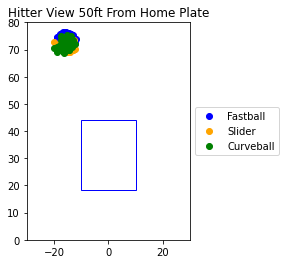

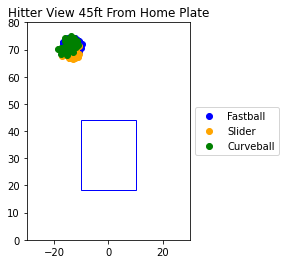

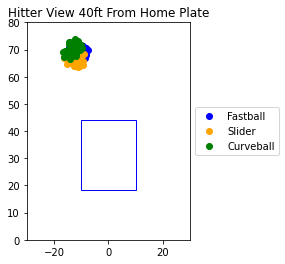

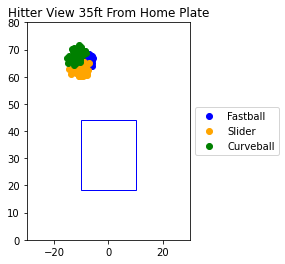

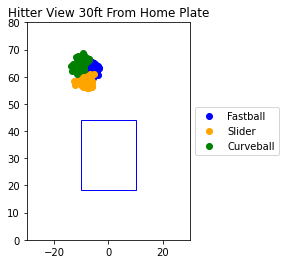

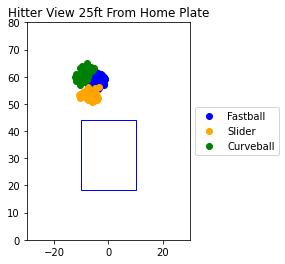

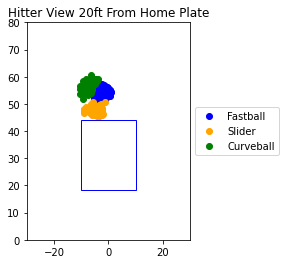

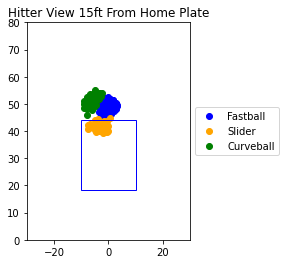

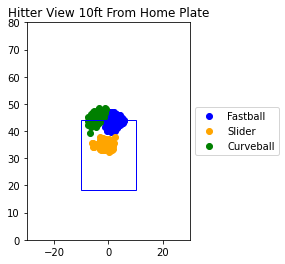

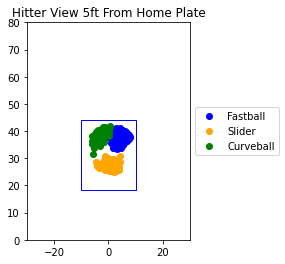

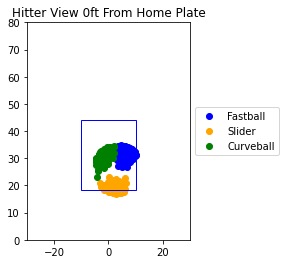

In [26]:
execute({'fb': fb_df, 'sl': sl_df, 'cu': cu_df}, centroid=centroid, radius=radius, ends_in_zone=True)

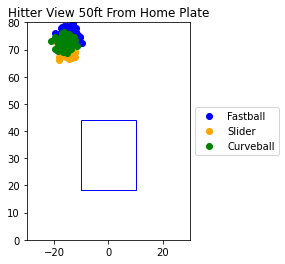

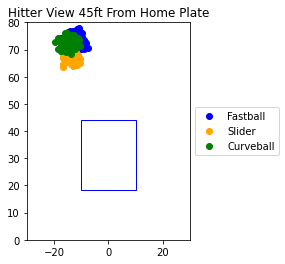

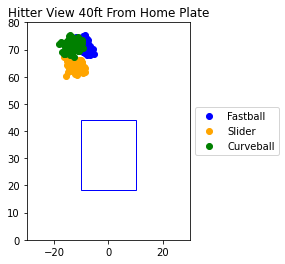

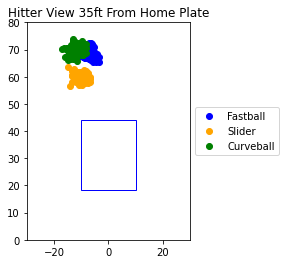

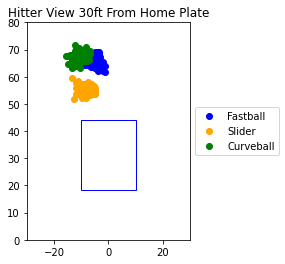

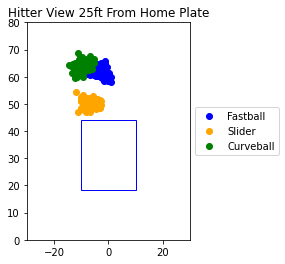

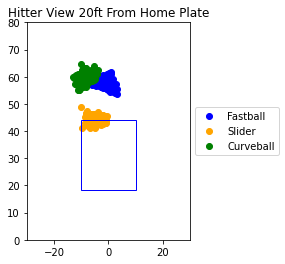

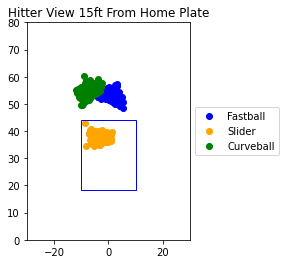

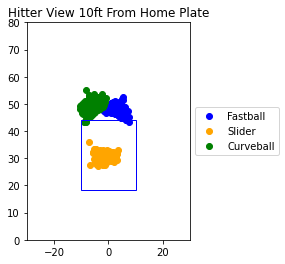

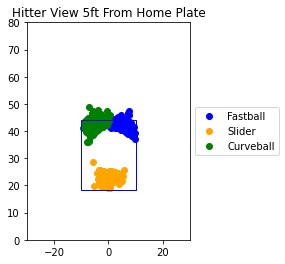

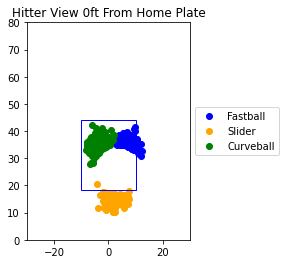

In [27]:
execute({'fb': fb_df, 'sl': sl_df, 'cu': cu_df}, centroid=centroid, radius=radius, ends_in_zone=False)